In [2]:
# Import the necceasary packages

# Numerical Operations
import pandas as pd
import numpy as np
import os

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

#Remove warnings
import warnings
warnings.filterwarnings('ignore')

#Date
import datetime as dt

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

# for better visualization
plt.style.use('ggplot')

In [3]:
data=pd.read_csv(r"F:\PYTHON DATASCIENCE\visualization case study\SalesData.csv")
data

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48


# 1. Compare Sales by region for 2016 with 2015 using bar chart

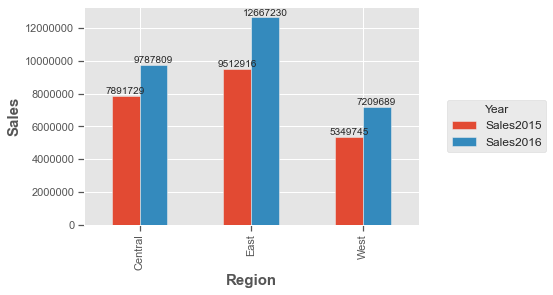

In [4]:
a=pd.pivot_table(data=data,index='Region',values=['Sales2015','Sales2016'],aggfunc='sum').round().plot.bar()
plt.ticklabel_format(style='plain',axis='y')
plt.xlabel('Region',fontsize=15,fontweight='bold')
plt.ylabel('Sales',fontsize=15,fontweight='bold')
plt.legend(title='Year',bbox_to_anchor=(1.4,0.6),fontsize=12)
for i in a.containers:
    a.bar_label(i,fmt='%d')


# 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

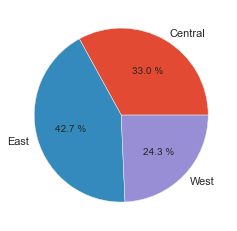

In [5]:
b=pd.pivot_table(data=data,index='Region',values='Sales2016',aggfunc='sum')
plt.pie(b.Sales2016,labels=b.index,autopct='%0.1f %%')
plt.show()

# 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers 

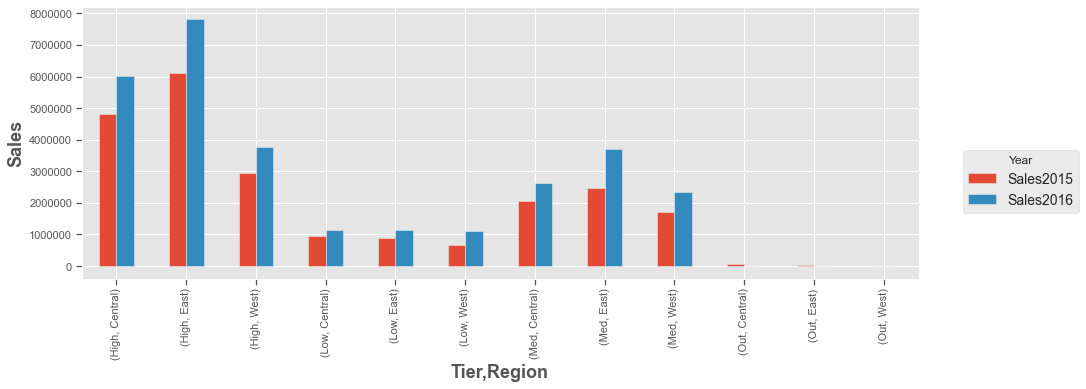

In [6]:
data.groupby(['Tier','Region'])[['Sales2015','Sales2016']].sum().plot.bar(figsize=(15,5))
plt.ticklabel_format(style='plain',axis='y')
plt.xlabel('Tier,Region',fontsize=18,fontweight='bold')
plt.ylabel('Sales',fontsize=18,fontweight='bold')
plt.legend(title='Year',bbox_to_anchor=(1.2,0.5),fontsize=14)
plt.show()

# 4. In East region, which state registered a decline in 2016 as compared to 2015?

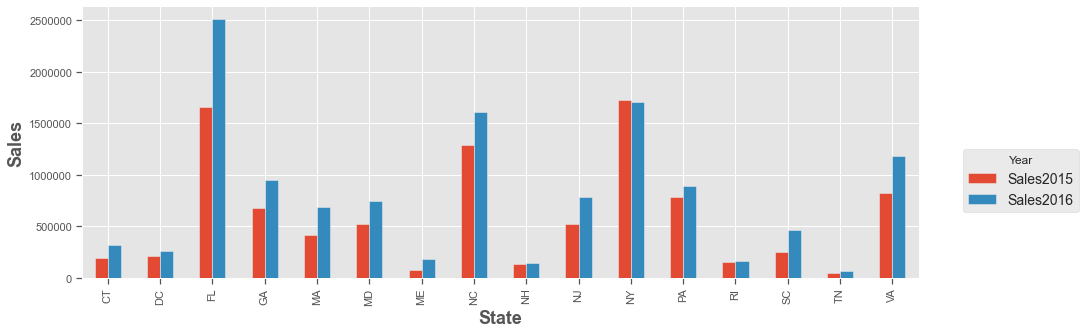

In east region ,Ny registered a decline in sales in 2016.


In [7]:
data.query('Region=="East"').groupby('State')[['Sales2015','Sales2016']].sum().plot.bar(figsize=(15,5))
plt.ticklabel_format(style='plain',axis='y')
plt.xlabel('State',fontsize=18,fontweight='bold')
plt.ylabel('Sales',fontsize=18,fontweight='bold')
plt.legend(title='Year',bbox_to_anchor=(1.2,0.5),fontsize=14)
plt.show()
print('In east region ,Ny registered a decline in sales in 2016.')

# 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

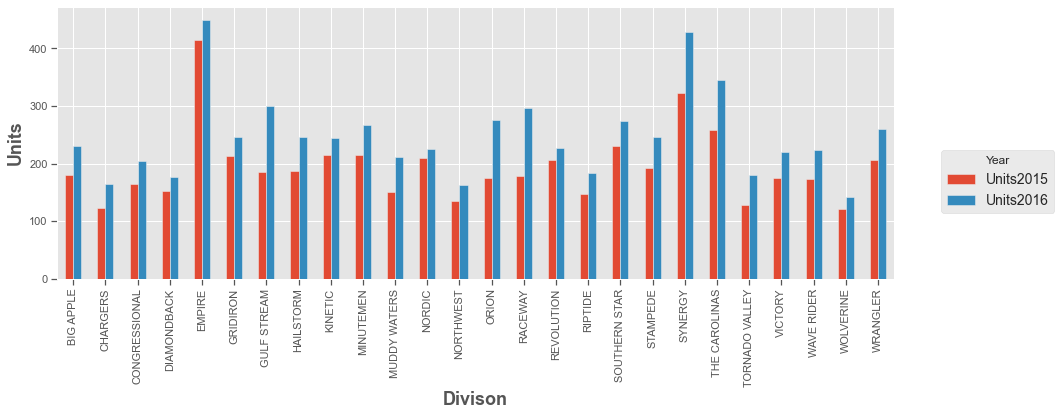

In High tier, there is no division which saw a decline in number of units sold in 2016 compared to 2015


In [8]:
data.query('Tier=="High"').groupby('Division')[['Units2015','Units2016']].sum().plot.bar(figsize=(15,5))
plt.ticklabel_format(style='plain',axis='y')
plt.xlabel('Divison',fontsize=18,fontweight='bold')
plt.ylabel('Units',fontsize=18,fontweight='bold')
plt.legend(title='Year',bbox_to_anchor=(1.2,0.5),fontsize=14)
plt.show()
print('In High tier, there is no division which saw a decline in number of units sold in 2016 compared to 2015')

# 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
# • Jan - Mar : Q1
# • Apr - Jun : Q2
# • Jul - Sep : Q3
# • Oct - Dec : Q4

In [9]:
def qua(i):
    if i in ['Jan','Feb','Mar']:
        result='Q1'
    elif i in ['Apr','May','Jun']:
        result='Q2'
    elif i in ['Jul','Aug','Sep']:
        result='Q3'
    else:
        result='Q4'
    return result
data['Qtr']=data.Month.apply(qua)
data    

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14,Q1
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11,Q3
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55,Q4
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48,Q1


# 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot


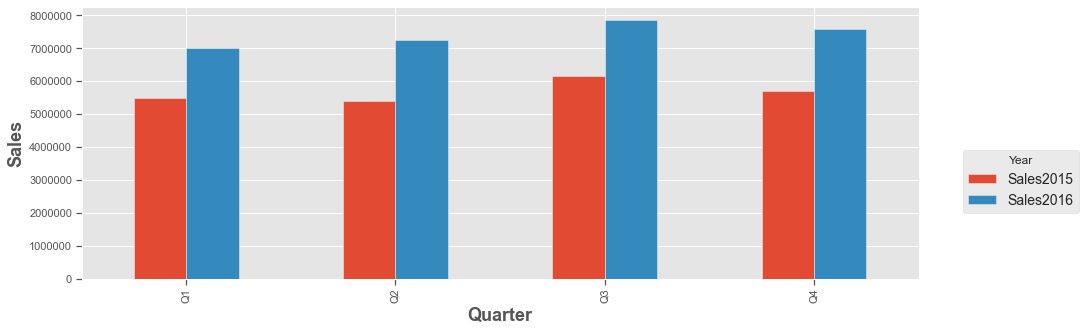

In [10]:
data.groupby('Qtr')[['Sales2015','Sales2016']].sum().plot.bar(figsize=(15,5))
plt.ticklabel_format(style='plain',axis='y')
plt.xlabel('Quarter',fontsize=18,fontweight='bold')
plt.ylabel('Sales',fontsize=18,fontweight='bold')
plt.legend(title='Year',bbox_to_anchor=(1.2,0.5),fontsize=14)
plt.show()

# 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

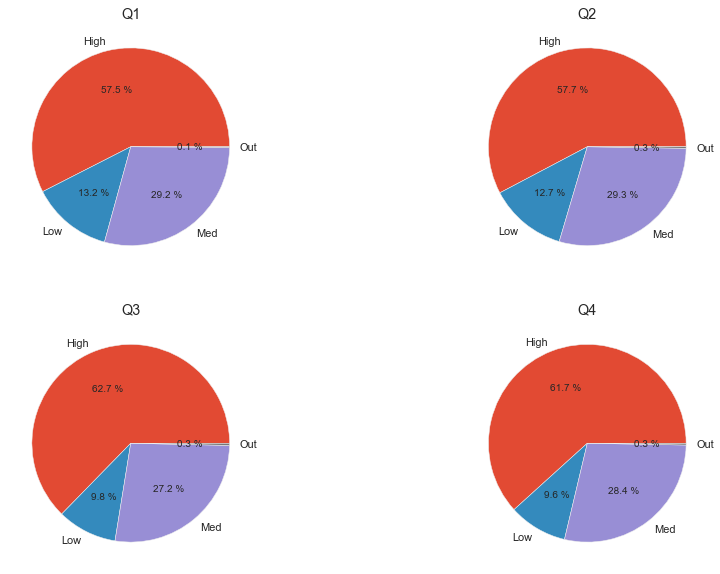

In [11]:
data['Total Sales in 2015 and 2016']=data.Sales2015 + data.Sales2016
q8=pd.pivot_table(data=data,columns='Qtr',index='Tier',values='Total Sales in 2015 and 2016',aggfunc='sum')
f, axes=plt.subplots(2,2,figsize=(15,10))
axes[0,0].pie(q8.Q1,labels=q8.index,autopct='%0.1f %%')
axes[0,0].set_title("Q1")
axes[0,1].pie(q8.Q2,labels=q8.index,autopct='%0.1f %%')
axes[0,1].set_title("Q2")
axes[1,0].pie(q8.Q3,labels=q8.index,autopct='%0.1f %%')
axes[1,0].set_title("Q3")
axes[1,1].pie(q8.Q4,labels=q8.index,autopct='%0.1f %%')
axes[1,1].set_title("Q4")
plt.show()
